# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

from palmerpenguins import load_penguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [2]:
penguins_final = pd.get_dummies(penguins)
penguins_final.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [5]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, accuracy_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline


In [12]:
#best variables from linear models
X = penguins_final[['bill_length_mm', 'flipper_length_mm', 'species_Adelie', 'sex_male']]
Y = penguins_final['bill_depth_mm']

# Model 1 Linear
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
cv_scores_lr = cross_val_score(pipeline_lr, X, Y, cv=5, scoring='neg_mean_squared_error')
mean_mse_lr = -np.mean(cv_scores_lr)

# Model 2 knn 3
pipeline_knn1 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3))
])
cv_scores_knn1 = cross_val_score(pipeline_knn1, X, Y, cv=5, scoring='neg_mean_squared_error')
mean_mse_knn1 = -np.mean(cv_scores_knn1)

# Model 3 knn 7
pipeline_knn2 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=7))
])
cv_scores_knn2 = cross_val_score(pipeline_knn2, X, Y, cv=5, scoring='neg_mean_squared_error')
mean_mse_knn2 = -np.mean(cv_scores_knn2)

# Model 4 Decision tree
pipeline_tree = Pipeline([
    ('tree', DecisionTreeRegressor(random_state=42))
])
cv_scores_tree = cross_val_score(pipeline_tree, X, Y, cv=5, scoring='neg_mean_squared_error')
mean_mse_tree = -np.mean(cv_scores_tree)

print(f"Linear Regression: {mean_mse_lr}")
print(f"k-NN (k=3): {mean_mse_knn1}")
print(f"k-NN (k=7): {mean_mse_knn2}")
print(f"Decision Tree: {mean_mse_tree}")




Linear Regression: 3.584155510341109
k-NN (k=3): 2.3274710286949087
k-NN (k=7): 2.9650462437349434
Decision Tree: 2.0728878335594745


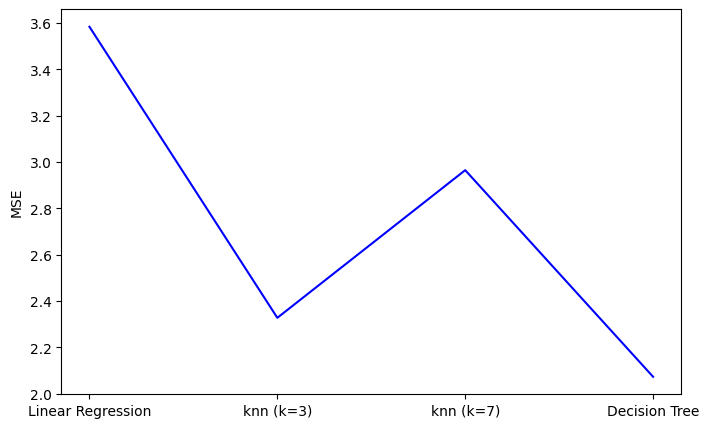

In [16]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'knn (k=3)', 'knn (k=7)', 'Decision Tree']

mse_values = [mean_mse_lr, mean_mse_knn1, mean_mse_knn2, mean_mse_tree]

plt.figure(figsize=(8, 5))
plt.plot(models, mse_values, color='blue', label='MSE')

plt.ylabel('MSE')
plt.show()



Decision tree seemed to be the best model with the given variables from the best linear model.